## <font color='red'>License plate text extractor

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(-0.5, 844.5, 439.5, -0.5)

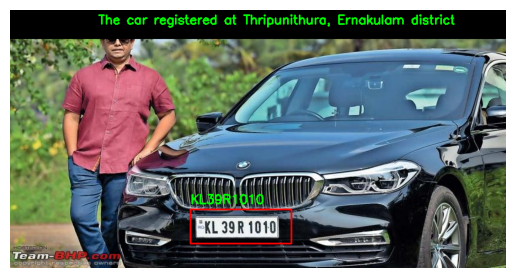

In [58]:
#importing necessary libraries
#testing with both pytesseract and easyocr to compare the result
import cv2
import re
import pytesseract   
from PIL import Image
import easyocr
import matplotlib.pyplot as plt
# Load the cascade classifier
dic={"KL01":"Thiruvananthapuram","KL02":"Kollam","KL03":"Pathanamthitta","KL04":"Alappuzha","KL05":"Kottayam","KL06":"Idukki","KL07":"Ernakulam","KL08":"Thrissur","KL09":"Palakkad","KL10":"Malappuram","KL11":"Kozhikode","KL12":"Wayanad","KL13":"Kannur","KL14":"Kasaragod","KL15":"KSRTC buses","KL16":"Attingal, Thiruvananthapuram district","KL17":"Muvattupuzha, Ernakulam district","KL18":"Vadakara, Kozhikode district","KL19":"Parassala, Thiruvananthapuram district","KL20":"Neyyattinkara, Thiruvananthapuram district","KL21":"Nedumangad, Thiruvananthapuram district","KL22":"Kazhakkoottam, Thiruvananthapuram district","KL23":"Karunagapally, Kollam district","KL24":"Kottarakara, Kollam district","KL25":"Punalur, kollam district","KL26":"Adoor, Pathanamthitta district",
"KL27":"Thiruvalla, Pathanamthitta district","KL28":"Mallappally, Pathanamthitta district","KL29":"Kayamkulam, Alappuzha district","KL30":"Chengannur, Alappuzha district","KL31":"Mavelikara, Alappuzha district","KL32":"Cherthala, Alappuzha district","KL33":"Changanassery, Kottayam district","KL34":"Kanjirappally, Kottayam district","KL35":"Pala, Kottayam district","KL36":"Vaikom, Kottayam district","KL37":"Vandiperiyar, Idukki district","KL38":"Thodupuzha, Idukki district","KL39":"Thripunithura, Ernakulam district","KL40":"Perumbavoor, Ernakulam district","KL41":"Aluva, Ernakulam district","KL42":"North Paravur, Ernakulam district","KL43":"Mattancherry, Ernakulam district","KL44":"Kothamangalam, Ernakulam district","KL45":"Irinjalakuda, Thrissur district",
"KL46":"Guruvayur, Thrissur district","KL47":"Kodungallur, Thrissur district","KL48":"Wadakkancherry, Thrissur district","KL49":"Alathur, Palakkad district","KL50":"Mannarkkad, Palakkad district","KL51":"Ottappalam, Palakkad district","KL52":"Pattambi, Palakkad district","KL53":"Perinthalmanna, Malappuram district","KL54":"Ponnani, Malappuram district","KL55":"Tirur, Malappuram district","KL56":"Koyilandi, Kozhikode district","KL57":"Koduvally, Kozhikode district","KL58":"Thalassery, Kannur district","KL59":"Thaliparamba, Kannur district","KL60":"Kanhangad, Kasaragod district","KL61":"Kunnathur, Kollam district","KL62":"Ranni, Pathanamthitta district","KL63":"Angamaly, Ernakulam district","KL64":"Chalakkudy, Thrissur district","KL65":"Thirurangadi, Malappuram district",
"KL66":"Kuttanadu, Alappuzha district","KL67":"Uzhavoor, Kottayam district","KL68":"Devikulam, Idukki district","KL69":"Udumbanchola, Idukki district","KL70":"Chittur, Palakkad district","KL71":"Nilambur, Malappuram district","KL72":"Mananthavady, Wayanad district","KL73":"Sulthan Bathery, Wayanad district","KL74":"Kattakkada, Thiruvananthapuram district","KL75":"Thriprayar, Thrissur district","KL76":"Nanmanda, Kozhikode district","KL77":"Perambra, Kozhikode district","KL78":"Iritty, Kannur district","KL79":"Vellarikundu, Kasaragod district"}

cascade_path = '/home/hduser/Documents/Data science files/cascade/haarcascade_russian_plate_number.xml'
cascade = cv2.CascadeClassifier(cascade_path)


# Read the input image
image = cv2.imread('/home/hduser/Downloads/vehicle4.jpg')
# image = cv2.resize(image,(720,480)) #no need to resize
#gray scaling the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect number plates
number_plates = cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)

# Draw a rectangle around the number plate
for (x, y, w, h) in number_plates:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Crop the region containing the number plate
    number_plate = gray[y:y+h, x:x+w]
    
    # Perform OCR on the region
    text_py = pytesseract.image_to_string(number_plate)
    reader = easyocr.Reader(['en'])
    
    text_ocr_com = reader.readtext(number_plate)
    text_ocr = ''
    for i in text_ocr_com:
        if i[-1]>0.5:
            text_ocr = text_ocr + i[-2]
            
    text_ocr=text_ocr.upper()
    text_ocr = re.sub('[^a-zA-Z0-9]','',text_ocr)
    
    
    
    
    # Put the text on the image
    cv2.putText(image, str(text_ocr), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
    
    cv2.rectangle(image,(0,0),(85000,50),(0,0,0),-1)
    location=''
    location=''
    for i in dic:
        if i == text_ocr[:4]:
            location = location+f'The car registered at {dic[i]}'
            
    cv2.putText(image,location,(150,25),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
            
        

# Show the image
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')
